# Minimal Demo — Hierarchical Refinement (`hiref_lr`) in JAX
This self‑contained demo shows how to call HiRef to align two synthetic point clouds. It includes:
- Lightweight JAX implementation of a balanced low‑rank OT subroutine and hierarchical refinement with cost.
- A simple synthetic dataset generator.
- Visualizations of input clouds and the final matched pairs.dex blocks.

In [12]:
import time
import math
import numpy as np
import jax
import jax.numpy as jnp
from jax import lax
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional
import torch
import sys
import examples
sys.path.insert(0, '../src')
print("JAX version:", jax.__version__)
key = jax.random.PRNGKey(0)

key = jax.random.PRNGKey(0)
k0, k1 = jax.random.split(key)


JAX version: 0.6.2


Optimized rank-annealing schedule: [32, 32]
Cost: 8.882486343383789


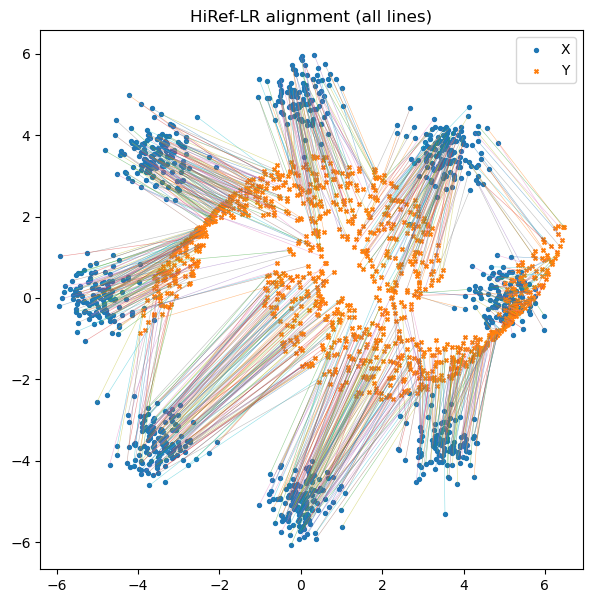

In [13]:
import src.rank_annealing as rank_annealing
import src.HiRef as HiRef
import src.HiRef_fast as HiRef_fast

batch_size1 = 1024
batch_size2 = 1024

X = examples.sample_8gaussians(k0, batch_size1)         # (batch_size1, 2)
Y = examples.sample_moons(batch_size2)   # (batch_size2, 2)

rank_schedule = rank_annealing.optimal_rank_schedule(1024, hierarchy_depth = 6, max_Q = 50, max_rank = 50 )
iters_per_level = 100
gamma = 40.0

frontier = HiRef_fast.hiref_lr_fast(X, Y, rank_schedule=rank_schedule,
                    base_rank=1,
                    iters_per_level=iters_per_level,
                    gamma=gamma,
                    rescale_cost=False,
                    return_coupling=False)

cost = HiRef_fast.compute_ot_cost(frontier, X, Y, C=None, sq_euclidean=True)
print("Cost:", float(cost))

examples.plot_alignment(frontier, X, Y, max_lines_per_leaf=None, sample_frac=None, title="HiRef-LR alignment (all lines)")

Optimized rank-annealing schedule: [80, 125]
Cost: 8.8715238571167


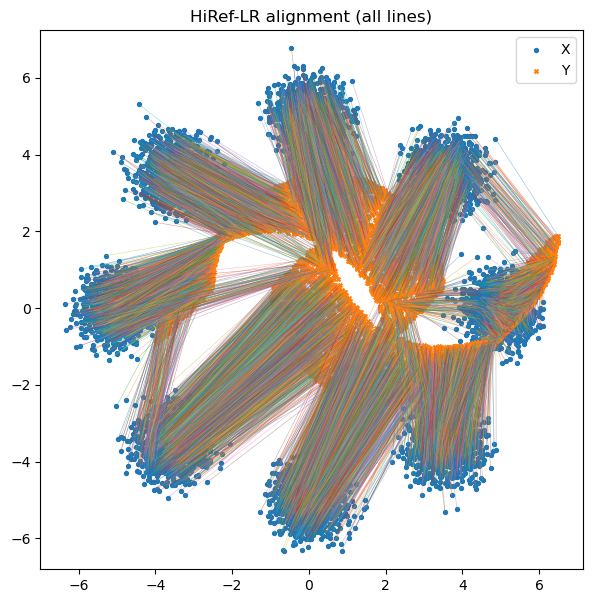

In [14]:

batch_size1 = 10000
batch_size2 = 10000

X = examples.sample_8gaussians(k0, batch_size1)         # (batch_size1, 2)
Y = examples.sample_moons(batch_size2)   # (batch_size2, 2)

rank_schedule = rank_annealing.optimal_rank_schedule(batch_size1, hierarchy_depth = 6, max_Q = 200, max_rank = 500 )
iters_per_level = 70
gamma = 40.0

frontier = HiRef_fast.hiref_lr_fast(X, Y, rank_schedule=rank_schedule,
                    base_rank=1,
                    iters_per_level=iters_per_level,
                    gamma=gamma,
                    rescale_cost=False,
                    return_coupling=False)

cost = HiRef_fast.compute_ot_cost(frontier, X, Y, C=None, sq_euclidean=True)
print("Cost:", float(cost))

examples.plot_alignment(frontier, X, Y, max_lines_per_leaf=None, sample_frac=None, title="HiRef-LR alignment (all lines)")


In [15]:

batch_size1 = 100000
batch_size2 = 100000

X = examples.sample_8gaussians(k0, batch_size1) # (batch_size1, 2)
Y = examples.sample_moons(batch_size2)   # (batch_size2, 2)

rank_schedule = rank_annealing.optimal_rank_schedule(batch_size1, hierarchy_depth = 6, max_Q = 1000, max_rank = 1000 )
iters_per_level = 10 # Can speed up by decreasing this, but it may sacrifice performance slightly
gamma = 40.0

frontier = HiRef_fast.hiref_lr_fast(X, Y, rank_schedule=rank_schedule,
                    base_rank=1,
                    iters_per_level=iters_per_level,
                    gamma=gamma,
                    rescale_cost=False,
                    return_coupling=False)
print("Finished! Computing cost.")


Optimized rank-annealing schedule: [125, 800]
Finished! Computing cost.


In [16]:

cost = HiRef_fast.compute_ot_cost(frontier, X, Y, C=None, sq_euclidean=True)
print("Cost:", float(cost))

# Can plot all 100k, but takes a very long time ...
# examples.plot_alignment(frontier, X, Y, max_lines_per_leaf=None, sample_frac=None, title="HiRef-LR alignment (all lines)")

Cost: 8.93112564086914
